Dynamic Programming Excercises
============================
Cyrus B

3/30/19

In [111]:
from math import floor
import random
from random import randint

T-primes problem
==============
A T-prime is a positive integer that has exactly 3 factors, like 4 which has the factors 2, 4, 1. In this problem you are given a list of n positive integers (between $ 1 $ and $10^{12}$) and asked to figure out which of the numbers are T-primes.

In [112]:
#Simple brute force version
def brute_force(nums):
    tprimes = []
    for n in nums:
        if _brute_force(n) == True:
            tprimes.append(n)
    return tprimes

def _brute_force(n):
    divisors = 1
    for i in range(1,n):
        if divisors > 3:
            return False
        if n % i == 0:
            divisors += 1

    #This last little bit of logic is because
    #1 and prime numbers are edgecases
    if divisors < 3:
        return False
    return True

In [113]:
n = []
for i in range(500):
    n.append(i)
brute_force(n)

[4, 9, 25, 49, 121, 169, 289, 361]

I thought about the math behind this problem before I wrote any code because I figured there would be some kind of pattern. So I worked out a handful by hand: $4, 9, 25, 49$ . One thing immediatley became clear to me, these are all squares of prime numbers: $2^{2} = 4$, $3^{3} = 9$, $5^{2} = 25$, $7^{2} = 49$ ... This makes a lot of sense because a prime number has only 2 factors, 1 and itself. When you multiply two numbers the new number's factors are those 2, along with their factors. Prime numbers always share a factor of 1, this means that when you square a prime P the new number N will have factors 1, P, and N. That's 3 factors which makes N a T-prime.

At this point I knew how to solve the problem, but wasn't sure if my idea would count as dynamic programming, so I looked at the solution and saw that Mr. Sanfoundry was doing the same thing I was going to do, yay! The only difference is that Mr. Sanfoundry used Eratothene's prime seive but I used Sundaram's prime seive just because that is the one I usually use.

In [114]:
def seive_sundaram(n):
    """
    This is the seive of Sundaram that I use
    for my personal projects.
    Modified slightly to produce t-primes
    I am also returning the t-primes as a dict (hash table)
    because the problem involves checking to make sure a certain
    number is a t-prime so look-up operations need to be fast.
    """
    m = floor(n / 2)
    l = [True] * m
    for i in range(1, m):
        for j in range(i, floor((m - i)/((2*i) + 1))):
            l[i + j + 2*i*j] = False
            
    primes = {}
    for i in range(len(l)):
        if l[i] == True: primes[(2*i + 1)**2] = True
    #1 and 4 are edge cases for my (t) Prime seive
    primes[4] = True
    primes.pop(1)
    
    return primes

def tprimes(nums):
    #If we need numbers up to 10^12 we only need to go 10^6 since
    #that would be the largest possible factor.
    primes = seive_sundaram(10**6)
    for i in nums:
        if i in primes:
            print(f"{i} is a T-Prime")
            
test_numbers = [49, 4, 1, 12, 234, 54, 3214, 563, 
                234, 543, 27889, 29929]
    
tprimes(test_numbers)

49 is a T-Prime
4 is a T-Prime
27889 is a T-Prime
29929 is a T-Prime


Binomial Coefficients
==================

This problem is to implement ${n \choose k}$ (the number of ways you could pick k items from n items).

The definition of choose is ${n \choose k}$ = $ \frac{n!}{k!(n - k)!} $ this makes sense for a dynamic programming exercise because you can define a factorial using the following linear recurrance relation: ${n!} = n(n-1)!$ knowing that $0! = 1$

Another useful definition for this problem is the Pascal's formula: 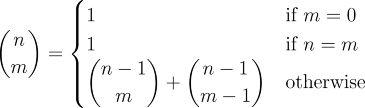 


Image source: http://masc.cs.gmu.edu/wiki/BinomialCoefficients 

Here is a picture I made to better visualize what this means, it is a Pascal's Triangle but with combinations instead of numbers.

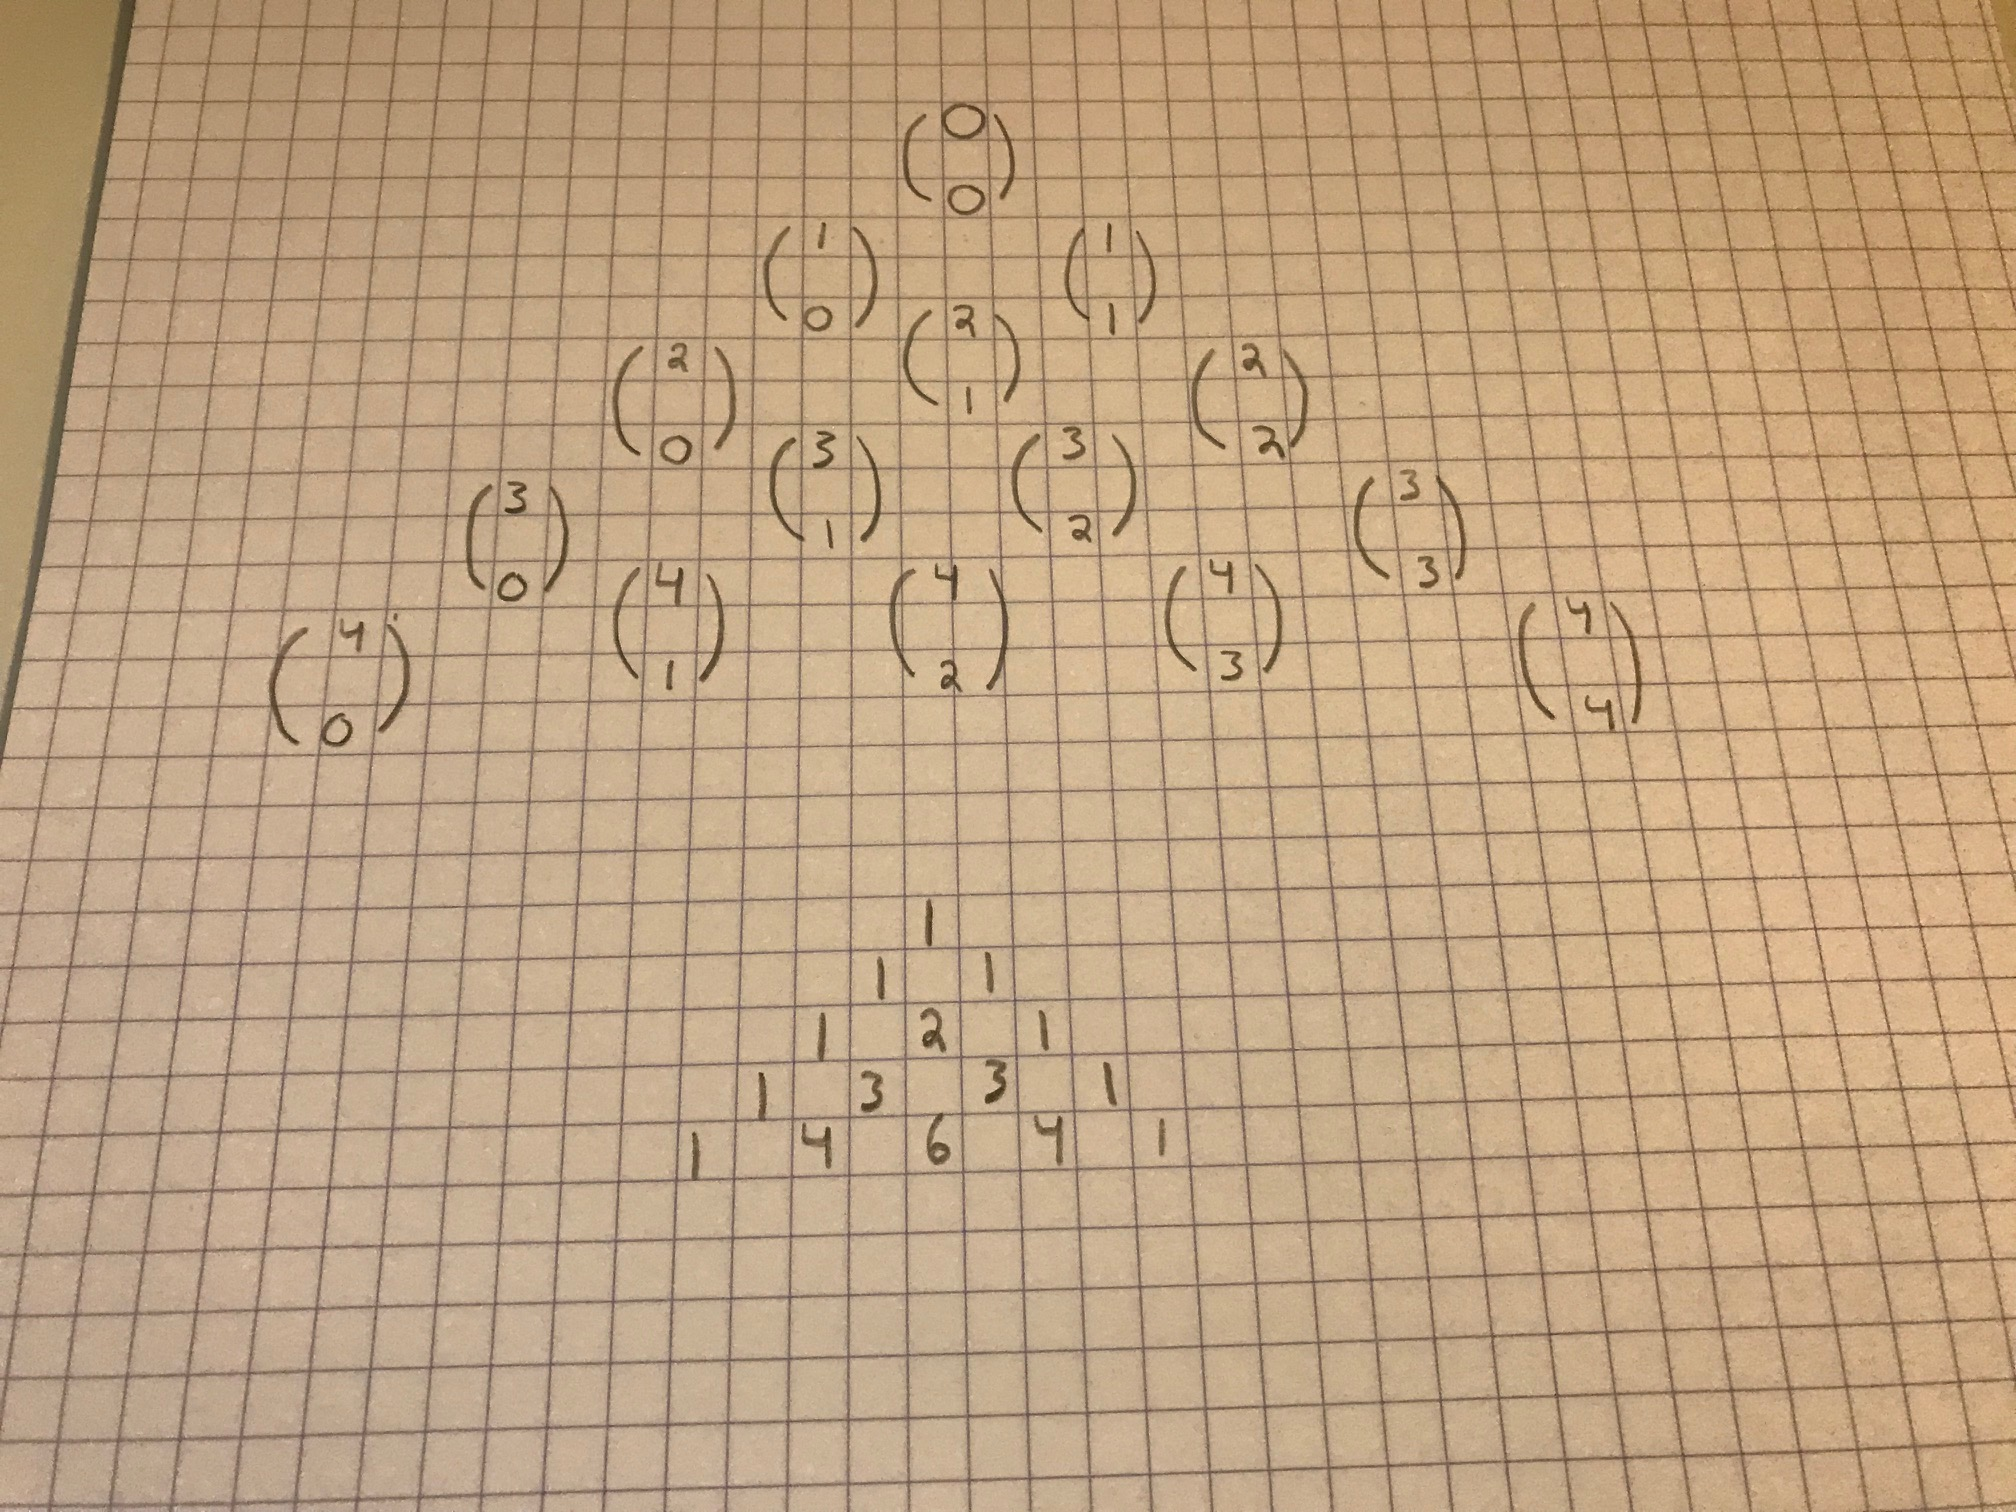


From this image we can see that ${n \choose k} + {n \choose k + 1} = {n + 1 \choose k + 1} $ (This is where the Pascal's formula comes from).

In my implementation I am building up the pascal triangle and memoizing the values in what is essentially an adjacency matrix.

In [115]:
def choose(n, k):
    cache = [[0 for j in range(k + 1)] for i in range(n + 1)]
    j = 0
    for i in range(n + 1):
        for j in range(min(i, k) + 1):
            if j == 0 or j == i:
                cache[i][j] = 1
            else:
                cache[i][j] = cache[i - 1][j - 1]+cache[i - 1][j]
    return cache[n][k]

choose(7, 5) #7 choose 5 should be 21

21

Sources:
https://www.sanfoundry.com/dynamic-programming-problems-solutions/
http://masc.cs.gmu.edu/wiki/BinomialCoefficients
https://artofproblemsolving.com/wiki/index.php/Binomial_Theorem